In [81]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import folium
from folium import plugins
import seaborn as sns
from pywaffle import Waffle

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patches as mpatches
import matplotlib

In [82]:
df_can = pd.read_excel('data/canada_data.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [83]:
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2012  2013  \
0    Southern Asia  902  Developing regions    16  ...  2635  2004   
1  Southern Europe  901   Developed regions     1  ...   620   603   
2  Northern Africa  902  Developing regions    80  ...  3774  4331   
3        Polynesia  902  Developing regions     0  ...     0     0   
4  Southern Europe  901   Developed regions     0  ...     1     1   

   Unnamed: 43  Unnamed: 44  Unnamed: 45  Unnamed: 46  Unnamed: 47  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 48  Unnamed: 49  Unnamed: 50  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN  

[5 rows x 51 columns]

In [84]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         195 non-null    object 
 1   Coverage     195 non-null    object 
 2   OdName       195 non-null    object 
 3   AREA         195 non-null    int64  
 4   AreaName     195 non-null    object 
 5   REG          195 non-null    int64  
 6   RegName      195 non-null    object 
 7   DEV          195 non-null    int64  
 8   DevName      195 non-null    object 
 9   1980         195 non-null    int64  
 10  1981         195 non-null    int64  
 11  1982         195 non-null    int64  
 12  1983         195 non-null    int64  
 13  1984         195 non-null    int64  
 14  1985         195 non-null    int64  
 15  1986         195 non-null    int64  
 16  1987         195 non-null    int64  
 17  1988         195 non-null    int64  
 18  1989         195 non-null    int64  
 19  1990    

In [85]:
df_can.columns

Index([       'Type',    'Coverage',      'OdName',        'AREA',
          'AreaName',         'REG',     'RegName',         'DEV',
           'DevName',          1980,          1981,          1982,
                1983,          1984,          1985,          1986,
                1987,          1988,          1989,          1990,
                1991,          1992,          1993,          1994,
                1995,          1996,          1997,          1998,
                1999,          2000,          2001,          2002,
                2003,          2004,          2005,          2006,
                2007,          2008,          2009,          2010,
                2011,          2012,          2013, 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

In [86]:
df_can.index

RangeIndex(start=0, stop=195, step=1)

In [87]:
## coverting series to list:
this =df_can.index.values.tolist()

In [88]:
## dropping area,reg,dev,type,coverage:
df_can.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)

In [89]:
df_can['Total'] = df_can.sum(axis=1)

In [90]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([    'Country',   'Continent',      'Region',     'DevName',
                1980,          1981,          1982,          1983,
                1984,          1985,          1986,          1987,
                1988,          1989,          1990,          1991,
                1992,          1993,          1994,          1995,
                1996,          1997,          1998,          1999,
                2000,          2001,          2002,          2003,
                2004,          2005,          2006,          2007,
                2008,          2009,          2010,          2011,
                2012,          2013, 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50',       'Total'],
      dtype='object')

In [91]:
## finding the number of null objects:
df_can.isnull().sum()

Country          0
Continent        0
Region           0
DevName          0
1980             0
1981             0
1982             0
1983             0
1984             0
1985             0
1986             0
1987             0
1988             0
1989             0
1990             0
1991             0
1992             0
1993             0
1994             0
1995             0
1996             0
1997             0
1998             0
1999             0
2000             0
2001             0
2002             0
2003             0
2004             0
2005             0
2006             0
2007             0
2008             0
2009             0
2010             0
2011             0
2012             0
2013             0
Unnamed: 43    195
Unnamed: 44    195
Unnamed: 45    195
Unnamed: 46    195
Unnamed: 47    195
Unnamed: 48    195
Unnamed: 49    195
Unnamed: 50    195
Total            0
dtype: int64

In [92]:
df_can.describe()

1980          1981          1982          1983          1984  \
count    195.000000    195.000000    195.000000    195.000000    195.000000   
mean     508.394872    566.989744    534.723077    387.435897    376.497436   
std     1949.588546   2152.643752   1866.997511   1204.333597   1198.246371   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%       13.000000     10.000000     11.000000     12.000000     13.000000   
75%      251.500000    295.500000    275.000000    173.000000    181.000000   
max    22045.000000  24796.000000  20620.000000  10015.000000  10170.000000   

              1985         1986          1987          1988          1989  \
count   195.000000   195.000000    195.000000    195.000000    195.000000   
mean    358.861538   441.271795    691.133333    714.389744    843.241026   
std    1079.309600  1225.576630   2109.205607   2443.606788   2555.048874   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%       0.000000     0.500000      0.500000      1.000000      1.000000   
50%      17.000000    18.000000     26.000000     34.000000     44.000000   
75%     197.000000   254.000000    434.000000    409.000000    508.500000   
max    9564.000000  9470.000000  21337.000000  27359.000000  23795.000000   

       ...          2013  Unnamed: 43  Unnamed: 44  Unnamed: 45  Unnamed: 46  \
count  ...    195.000000          0.0          0.0          0.0          0.0   
mean   ...   1320.702564          NaN          NaN          NaN          NaN   
std    ...   4237.951988          NaN          NaN          NaN          NaN   
min    ...      0.000000          NaN          NaN          NaN          NaN   
25%    ...     45.000000          NaN          NaN          NaN          NaN   
50%    ...    213.000000          NaN          NaN          NaN          NaN   
75%    ...    796.000000          NaN          NaN          NaN          NaN   
max    ...  34129.000000          NaN          NaN          NaN          NaN   

       Unnamed: 47  Unnamed: 48  Unnamed: 49  Unnamed: 50          Total  
count          0.0          0.0          0.0          0.0     195.000000  
mean           NaN          NaN          NaN          NaN   32867.451282  
std            NaN          NaN          NaN          NaN   91785.498686  
min            NaN          NaN          NaN          NaN       1.000000  
25%            NaN          NaN          NaN          NaN     952.000000  
50%            NaN          NaN          NaN          NaN    5018.000000  
75%            NaN          NaN          NaN          NaN   22239.500000  
max            NaN          NaN          NaN          NaN  691904.000000  

[8 rows x 43 columns]

In [93]:
## setting the coutry column as the index :
df_can.set_index(df_can['Country'],inplace=True)

In [94]:
df_can.head()

Country Continent           Region             DevName  \
Country                                                                         
Afghanistan        Afghanistan      Asia    Southern Asia  Developing regions   
Albania                Albania    Europe  Southern Europe   Developed regions   
Algeria                Algeria    Africa  Northern Africa  Developing regions   
American Samoa  American Samoa   Oceania        Polynesia  Developing regions   
Andorra                Andorra    Europe  Southern Europe   Developed regions   

                1980  1981  1982  1983  1984  1985  ...  2013  Unnamed: 43  \
Country                                             ...                      
Afghanistan       16    39    39    47    71   340  ...  2004          NaN   
Albania            1     0     0     0     0     0  ...   603          NaN   
Algeria           80    67    71    69    63    44  ...  4331          NaN   
American Samoa     0     1     0     0     0     0  ...     0          NaN   
Andorra            0     0     0     0     0     0  ...     1          NaN   

                Unnamed: 44  Unnamed: 45  Unnamed: 46  Unnamed: 47  \
Country                                                              
Afghanistan             NaN          NaN          NaN          NaN   
Albania                 NaN          NaN          NaN          NaN   
Algeria                 NaN          NaN          NaN          NaN   
American Samoa          NaN          NaN          NaN          NaN   
Andorra                 NaN          NaN          NaN          NaN   

                Unnamed: 48  Unnamed: 49  Unnamed: 50    Total  
Country                                                         
Afghanistan             NaN          NaN          NaN  58639.0  
Albania                 NaN          NaN          NaN  15699.0  
Algeria                 NaN          NaN          NaN  69439.0  
American Samoa          NaN          NaN          NaN      6.0  
Andorra                 NaN          NaN          NaN     15.0  

[5 rows x 47 columns]

In [95]:
df_can.drop(['Country'],axis=1,inplace=True)

In [96]:
df_can.head()

Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...  2013  Unnamed: 43  \
Country                                       ...                      
Afghanistan       39    47    71   340   496  ...  2004          NaN   
Albania            0     0     0     0     1  ...   603          NaN   
Algeria           71    69    63    44    69  ...  4331          NaN   
American Samoa     0     0     0     0     0  ...     0          NaN   
Andorra            0     0     0     0     2  ...     1          NaN   

                Unnamed: 44  Unnamed: 45  Unnamed: 46  Unnamed: 47  \
Country                                                              
Afghanistan             NaN          NaN          NaN          NaN   
Albania                 NaN          NaN          NaN          NaN   
Algeria                 NaN          NaN          NaN          NaN   
American Samoa          NaN          NaN          NaN          NaN   
Andorra                 NaN          NaN          NaN          NaN   

                Unnamed: 48  Unnamed: 49  Unnamed: 50    Total  
Country                                                         
Afghanistan             NaN          NaN          NaN  58639.0  
Albania                 NaN          NaN          NaN  15699.0  
Algeria                 NaN          NaN          NaN  69439.0  
American Samoa          NaN          NaN          NaN      6.0  
Andorra                 NaN          NaN          NaN     15.0  

[5 rows x 46 columns]

In [97]:
print(df_can.loc['Japan',2013])

982


In [98]:
## converting column names from int to str:
df_can.columns = list(map(str, df_can.columns))

In [99]:
## how to get the strings easily as we converted the years to str:
years = list(map(str, range(1980, 2014)))

In [100]:
df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]

Continent         Region             DevName  1980  \
Country                                                                         
Afghanistan                     Asia  Southern Asia  Developing regions    16   
Bangladesh                      Asia  Southern Asia  Developing regions    83   
Bhutan                          Asia  Southern Asia  Developing regions     0   
India                           Asia  Southern Asia  Developing regions  8880   
Iran (Islamic Republic of)      Asia  Southern Asia  Developing regions  1172   
Maldives                        Asia  Southern Asia  Developing regions     0   
Nepal                           Asia  Southern Asia  Developing regions     1   
Pakistan                        Asia  Southern Asia  Developing regions   978   
Sri Lanka                       Asia  Southern Asia  Developing regions   185   

                            1981  1982  1983  1984  1985  1986  ...   2013  \
Country                                                         ...          
Afghanistan                   39    39    47    71   340   496  ...   2004   
Bangladesh                    84    86    81    98    92   486  ...   3789   
Bhutan                         0     0     0     1     0     0  ...    487   
India                       8670  8147  7338  5704  4211  7150  ...  33087   
Iran (Islamic Republic of)  1429  1822  1592  1977  1648  1794  ...  11291   
Maldives                       0     0     1     0     0     0  ...      1   
Nepal                          1     6     1     2     4    13  ...   1308   
Pakistan                     972  1201   900   668   514   691  ...  12603   
Sri Lanka                    371   290   197  1086   845  1838  ...   2394   

                            Unnamed: 43  Unnamed: 44  Unnamed: 45  \
Country                                                             
Afghanistan                         NaN          NaN          NaN   
Bangladesh                          NaN          NaN          NaN   
Bhutan                              NaN          NaN          NaN   
India                               NaN          NaN          NaN   
Iran (Islamic Republic of)          NaN          NaN          NaN   
Maldives                            NaN          NaN          NaN   
Nepal                               NaN          NaN          NaN   
Pakistan                            NaN          NaN          NaN   
Sri Lanka                           NaN          NaN          NaN   

                            Unnamed: 46  Unnamed: 47  Unnamed: 48  \
Country                                                             
Afghanistan                         NaN          NaN          NaN   
Bangladesh                          NaN          NaN          NaN   
Bhutan                              NaN          NaN          NaN   
India                               NaN          NaN          NaN   
Iran (Islamic Republic of)          NaN          NaN          NaN   
Maldives                            NaN          NaN          NaN   
Nepal                               NaN          NaN          NaN   
Pakistan                            NaN          NaN          NaN   
Sri Lanka                           NaN          NaN          NaN   

                            Unnamed: 49  Unnamed: 50     Total  
Country                                                         
Afghanistan                         NaN          NaN   58639.0  
Bangladesh                          NaN          NaN   65568.0  
Bhutan                              NaN          NaN    5876.0  
India                               NaN          NaN  691904.0  
Iran (Islamic Republic of)          NaN          NaN  175923.0  
Maldives                            NaN          NaN      30.0  
Nepal                               NaN          NaN   10222.0  
Pakistan                            NaN          NaN  241600.0  
Sri Lanka                           NaN          NaN  148358.0  

[9 rows x 46 columns]

## visualising data using matplotlib:


In [101]:
## applying different styles on matplotlib:
# we are using the inline backend

In [102]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [103]:
## using line plot:
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

<AxesSubplot:>

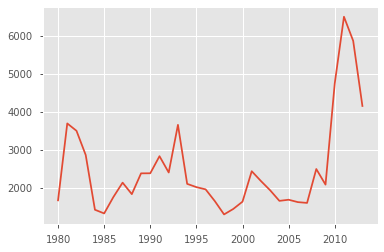

In [104]:
haiti.plot()

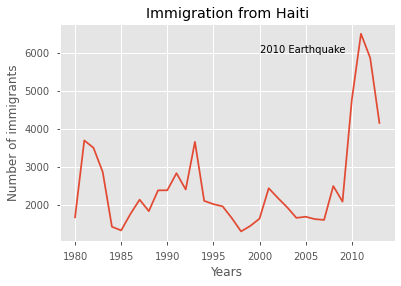

In [105]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.text(2000, 6000, '2010 Earthquake') 

plt.show() 


In [106]:
df_CI1 = df_can.loc[['India', 'China'], years]
df_CI = df_can.loc[['India', 'China'], years]

In [107]:
## transpose interchanges the columns and rows:
df_CI = df_CI.transpose()
df_CI.head()

Country  India  China
1980      8880   5123
1981      8670   6682
1982      8147   3308
1983      7338   1863
1984      5704   1527

In [108]:
df_CI1.head()

1980  1981  1982  1983  1984  1985  1986   1987   1988   1989  ...  \
Country                                                                 ...   
India    8880  8670  8147  7338  5704  4211  7150  10189  11522  10343  ...   
China    5123  6682  3308  1863  1527  1816  1960   2643   2758   4323  ...   

          2004   2005   2006   2007   2008   2009   2010   2011   2012   2013  
Country                                                                        
India    28235  36210  33848  28742  28261  29456  34235  27509  30933  33087  
China    36619  42584  33518  27642  30037  29622  30391  28502  33024  34129  

[2 rows x 34 columns]

In [109]:
df_can.head()

Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...  2013  Unnamed: 43  \
Country                                       ...                      
Afghanistan       39    47    71   340   496  ...  2004          NaN   
Albania            0     0     0     0     1  ...   603          NaN   
Algeria           71    69    63    44    69  ...  4331          NaN   
American Samoa     0     0     0     0     0  ...     0          NaN   
Andorra            0     0     0     0     2  ...     1          NaN   

                Unnamed: 44  Unnamed: 45  Unnamed: 46  Unnamed: 47  \
Country                                                              
Afghanistan             NaN          NaN          NaN          NaN   
Albania                 NaN          NaN          NaN          NaN   
Algeria                 NaN          NaN          NaN          NaN   
American Samoa          NaN          NaN          NaN          NaN   
Andorra                 NaN          NaN          NaN          NaN   

                Unnamed: 48  Unnamed: 49  Unnamed: 50    Total  
Country                                                         
Afghanistan             NaN          NaN          NaN  58639.0  
Albania                 NaN          NaN          NaN  15699.0  
Algeria                 NaN          NaN          NaN  69439.0  
American Samoa          NaN          NaN          NaN      6.0  
Andorra                 NaN          NaN          NaN     15.0  

[5 rows x 46 columns]

In [110]:
## trend of top 5 countries that contributed the most to immigration to Canada:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

In [111]:
df_top5 = df_can.head(5)
df_top5

Continent  \
Country                                                        
India                                                   Asia   
China                                                   Asia   
United Kingdom of Great Britain and Northern Ir...    Europe   
Philippines                                             Asia   
Pakistan                                                Asia   

                                                                Region  \
Country                                                                  
India                                                    Southern Asia   
China                                                     Eastern Asia   
United Kingdom of Great Britain and Northern Ir...     Northern Europe   
Philippines                                         South-Eastern Asia   
Pakistan                                                 Southern Asia   

                                                               DevName   1980  \
Country                                                                         
India                                               Developing regions   8880   
China                                               Developing regions   5123   
United Kingdom of Great Britain and Northern Ir...   Developed regions  22045   
Philippines                                         Developing regions   6051   
Pakistan                                            Developing regions    978   

                                                     1981   1982   1983  \
Country                                                                   
India                                                8670   8147   7338   
China                                                6682   3308   1863   
United Kingdom of Great Britain and Northern Ir...  24796  20620  10015   
Philippines                                          5921   5249   4562   
Pakistan                                              972   1201    900   

                                                     1984  1985  1986  ...  \
Country                                                                ...   
India                                                5704  4211  7150  ...   
China                                                1527  1816  1960  ...   
United Kingdom of Great Britain and Northern Ir...  10170  9564  9470  ...   
Philippines                                          3801  3150  4166  ...   
Pakistan                                              668   514   691  ...   

                                                     2013  Unnamed: 43  \
Country                                                                  
India                                               33087          NaN   
China                                               34129          NaN   
United Kingdom of Great Britain and Northern Ir...   5827          NaN   
Philippines                                         29544          NaN   
Pakistan                                            12603          NaN   

                                                    Unnamed: 44  Unnamed: 45  \
Country                                                                        
India                                                       NaN          NaN   
China                                                       NaN          NaN   
United Kingdom of Great Britain and Northern Ir...          NaN          NaN   
Philippines                                                 NaN          NaN   
Pakistan                                                    NaN          NaN   

                                                    Unnamed: 46  Unnamed: 47  \
Country                                                                        
India                                                       NaN          NaN   
China                                                       NaN          NaN   
United Kingdom of Great Britain and Northe

In [112]:
df_top5 = df_top5[years].transpose()


In [113]:
print(df_top5)

Country  India  China  United Kingdom of Great Britain and Northern Ireland  \
1980      8880   5123                                              22045      
1981      8670   6682                                              24796      
1982      8147   3308                                              20620      
1983      7338   1863                                              10015      
1984      5704   1527                                              10170      
1985      4211   1816                                               9564      
1986      7150   1960                                               9470      
1987     10189   2643                                              21337      
1988     11522   2758                                              27359      
1989     10343   4323                                              23795      
1990     12041   8076                                              31668      
1991     13734  14255                               

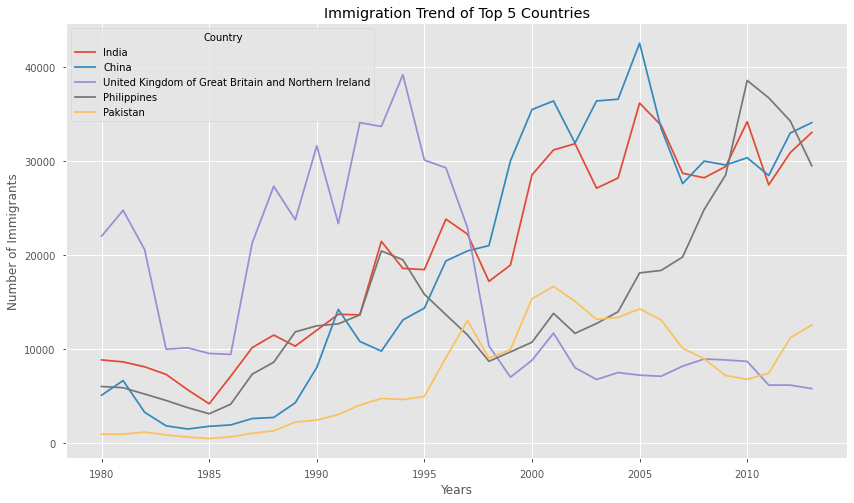

In [114]:
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line', figsize=(14, 8))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

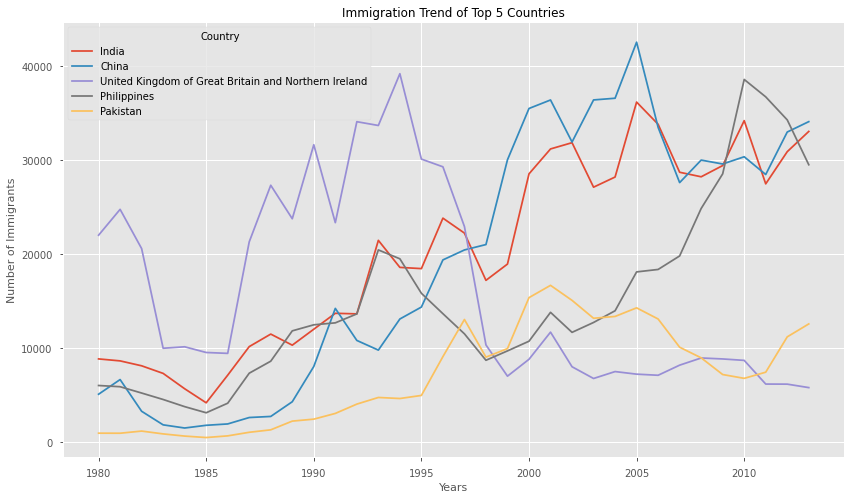

In [115]:
plt.style.use(['seaborn-notebook'])
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line', figsize=(14, 8))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

In [116]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## area plots: 
also known as stacked line plot

In [117]:
## first sorting the given dataframe in ascending order using the total column:
df_can.head()

Continent  \
Country                                                        
India                                                   Asia   
China                                                   Asia   
United Kingdom of Great Britain and Northern Ir...    Europe   
Philippines                                             Asia   
Pakistan                                                Asia   

                                                                Region  \
Country                                                                  
India                                                    Southern Asia   
China                                                     Eastern Asia   
United Kingdom of Great Britain and Northern Ir...     Northern Europe   
Philippines                                         South-Eastern Asia   
Pakistan                                                 Southern Asia   

                                                               DevName   1980  \
Country                                                                         
India                                               Developing regions   8880   
China                                               Developing regions   5123   
United Kingdom of Great Britain and Northern Ir...   Developed regions  22045   
Philippines                                         Developing regions   6051   
Pakistan                                            Developing regions    978   

                                                     1981   1982   1983  \
Country                                                                   
India                                                8670   8147   7338   
China                                                6682   3308   1863   
United Kingdom of Great Britain and Northern Ir...  24796  20620  10015   
Philippines                                          5921   5249   4562   
Pakistan                                              972   1201    900   

                                                     1984  1985  1986  ...  \
Country                                                                ...   
India                                                5704  4211  7150  ...   
China                                                1527  1816  1960  ...   
United Kingdom of Great Britain and Northern Ir...  10170  9564  9470  ...   
Philippines                                          3801  3150  4166  ...   
Pakistan                                              668   514   691  ...   

                                                     2013  Unnamed: 43  \
Country                                                                  
India                                               33087          NaN   
China                                               34129          NaN   
United Kingdom of Great Britain and Northern Ir...   5827          NaN   
Philippines                                         29544          NaN   
Pakistan                                            12603          NaN   

                                                    Unnamed: 44  Unnamed: 45  \
Country                                                                        
India                                                       NaN          NaN   
China                                                       NaN          NaN   
United Kingdom of Great Britain and Northern Ir...          NaN          NaN   
Philippines                                                 NaN          NaN   
Pakistan                                                    NaN          NaN   

                                                    Unnamed: 46  Unnamed: 47  \
Country                                                                        
India                                                       NaN          NaN   
China                                                       NaN          NaN   
United Kingdom of Great Britain and Northe

In [118]:
#already in descending:
#df_can.sort_values(by='Total', axis=1, ascending = False, inplace=True)
df_top5 = df_can.head(5)
df_top5

Continent  \
Country                                                        
India                                                   Asia   
China                                                   Asia   
United Kingdom of Great Britain and Northern Ir...    Europe   
Philippines                                             Asia   
Pakistan                                                Asia   

                                                                Region  \
Country                                                                  
India                                                    Southern Asia   
China                                                     Eastern Asia   
United Kingdom of Great Britain and Northern Ir...     Northern Europe   
Philippines                                         South-Eastern Asia   
Pakistan                                                 Southern Asia   

                                                               DevName   1980  \
Country                                                                         
India                                               Developing regions   8880   
China                                               Developing regions   5123   
United Kingdom of Great Britain and Northern Ir...   Developed regions  22045   
Philippines                                         Developing regions   6051   
Pakistan                                            Developing regions    978   

                                                     1981   1982   1983  \
Country                                                                   
India                                                8670   8147   7338   
China                                                6682   3308   1863   
United Kingdom of Great Britain and Northern Ir...  24796  20620  10015   
Philippines                                          5921   5249   4562   
Pakistan                                              972   1201    900   

                                                     1984  1985  1986  ...  \
Country                                                                ...   
India                                                5704  4211  7150  ...   
China                                                1527  1816  1960  ...   
United Kingdom of Great Britain and Northern Ir...  10170  9564  9470  ...   
Philippines                                          3801  3150  4166  ...   
Pakistan                                              668   514   691  ...   

                                                     2013  Unnamed: 43  \
Country                                                                  
India                                               33087          NaN   
China                                               34129          NaN   
United Kingdom of Great Britain and Northern Ir...   5827          NaN   
Philippines                                         29544          NaN   
Pakistan                                            12603          NaN   

                                                    Unnamed: 44  Unnamed: 45  \
Country                                                                        
India                                                       NaN          NaN   
China                                                       NaN          NaN   
United Kingdom of Great Britain and Northern Ir...          NaN          NaN   
Philippines                                                 NaN          NaN   
Pakistan                                                    NaN          NaN   

                                                    Unnamed: 46  Unnamed: 47  \
Country                                                                        
India                                                       NaN          NaN   
China                                                       NaN          NaN   
United Kingdom of Great Britain and Northe

In [119]:
## matplotlib always plot indices on the horizontal axis, hence we will have to transpose to the given matrix:
df_top5 = df_top5[years].transpose()

## we need only the years to plot the numeric data to the frame:
years = list(map(str,range(1980,2014)))

## we need to change the the index type to integers for plotting the given data into frame:
df_top5.index = df_top5.index.map(int)

<AxesSubplot:>

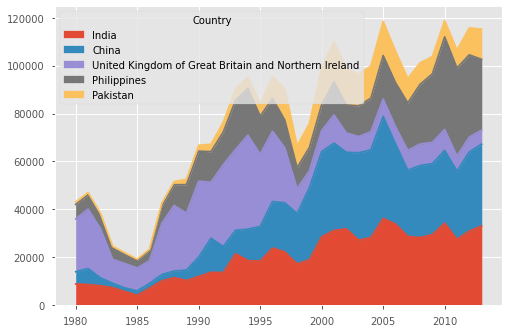

In [120]:
df_top5.plot(kind='area')
## this produces a stacked area plot using scripting layer of the matplotlib library

Text(0, 0.5, 'no.of immigrations')

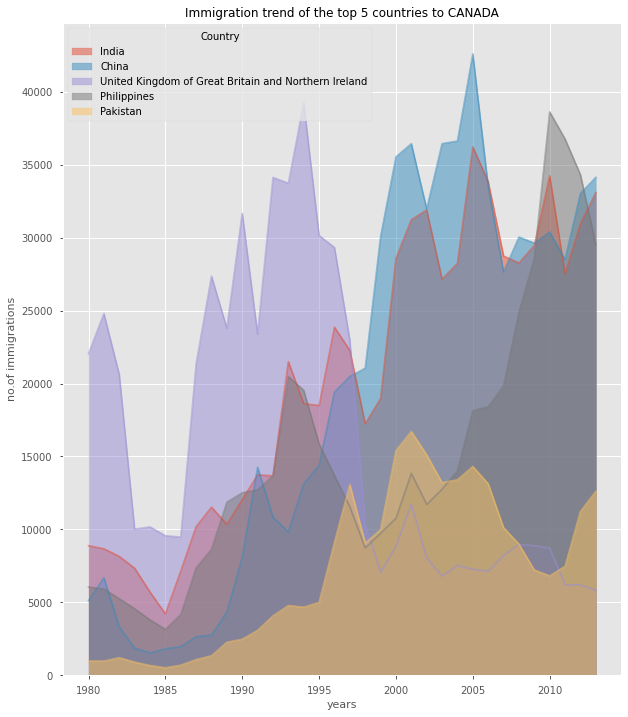

In [121]:
## to produce an unstacked area plot we should pass the stacked=False statement, alpha is the transparency value of the plot(alpha=0.5) i.e we cant see the overlap values of different plots:
df_top5.plot(kind='area',
             figsize=(10,12),
             stacked = False,
             alpha = 0.5)
plt.title('Immigration trend of the top 5 countries to CANADA')
plt.xlabel('years')
plt.ylabel('no.of immigrations')

Text(0.5, 0, 'Years')

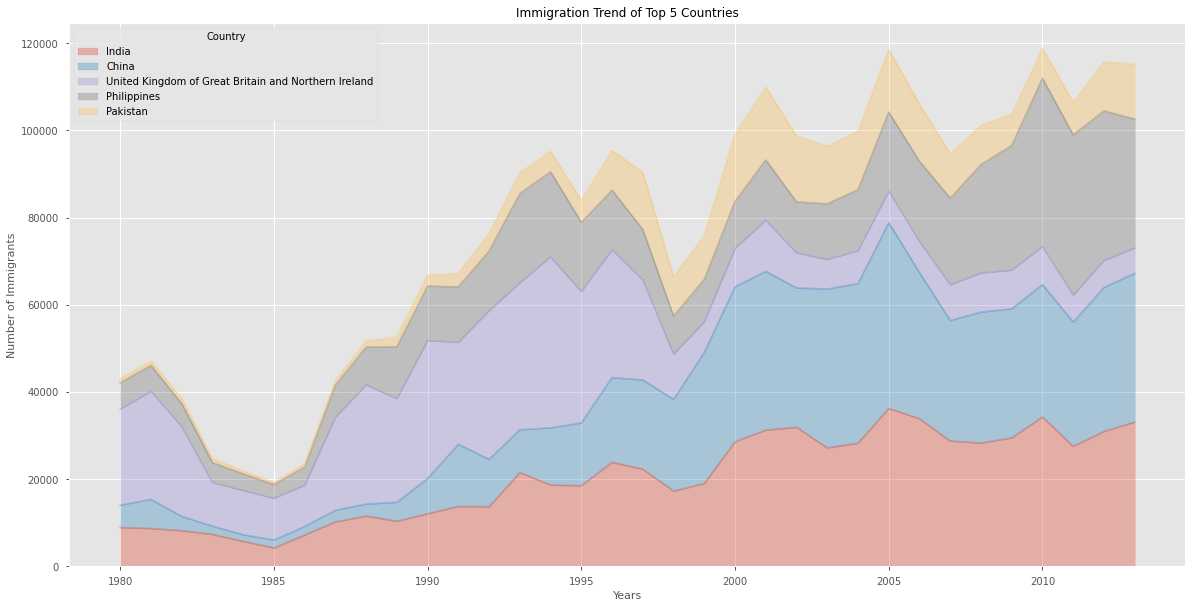

In [122]:
# producing an area plot using the artist layer of the matplotlib library:
## storing the plot in axes and then calling on the axes to make the changes in the plot:
ax = df_top5.plot(kind='area', alpha=0.35,stacked=True, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

## this method is used to produce complex charts

## Histograms 

In [123]:
## plotting the number of immigrants from all the countries in the year 2012:
df_can['2012'].head()

Country
India                                                   30933
China                                                   33024
United Kingdom of Great Britain and Northern Ireland     6195
Philippines                                             34315
Pakistan                                                11227
Name: 2012, dtype: int64

In [124]:
counts, bin_edges = np.histogram(df_can['2012'])
print (counts,bin_edges)
## default number of bins are set to 10

[178  11   2   1   0   0   0   0   0   3] [    0.   3431.5  6863.  10294.5 13726.  17157.5 20589.  24020.5 27452.
 30883.5 34315. ]


Text(0, 0.5, 'Number of countries')

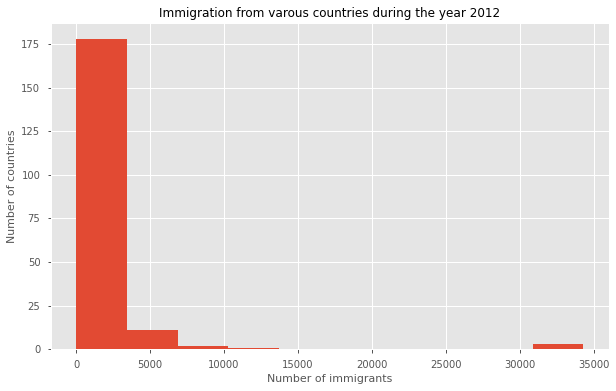

In [125]:
df_can['2012'].plot(kind='hist',figsize=(10,6))

plt.title('Immigration from varous countries during the year 2012')
plt.xlabel('Number of immigrants')
plt.ylabel('Number of countries')

## x labes do not match with the bin size

Text(0, 0.5, 'Number of countries')

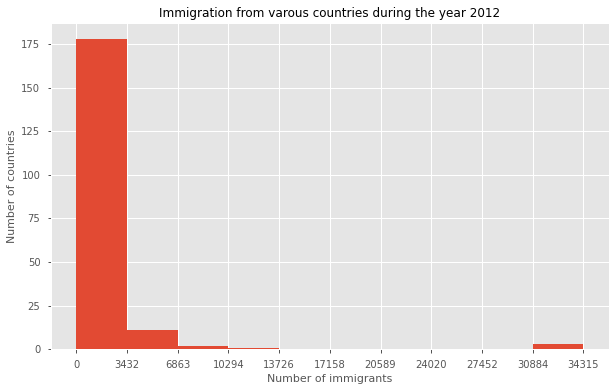

In [126]:
df_can['2012'].plot(kind='hist',figsize=(10,6),xticks=bin_edges)

plt.title('Immigration from varous countries during the year 2012')
plt.xlabel('Number of immigrants')
plt.ylabel('Number of countries')

In [127]:
## plotting the data of various countries:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'],years]
df_countries.head()

1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  \
Country                                                              ...   
Denmark   272   293   299   106    93    73    93   109   129   129  ...   
Norway    116    77   106    51    31    54    56    80    73    76  ...   
Sweden    281   308   222   176   128   158   187   198   171   182  ...   

         2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  
Country                                                              
Denmark    89    62   101    97   108    81    92    93    94    81  
Norway     73    57    53    73    66    75    46    49    53    59  
Sweden    129   205   139   193   165   167   159   134   140   140  

[3 rows x 34 columns]

<AxesSubplot:ylabel='Frequency'>

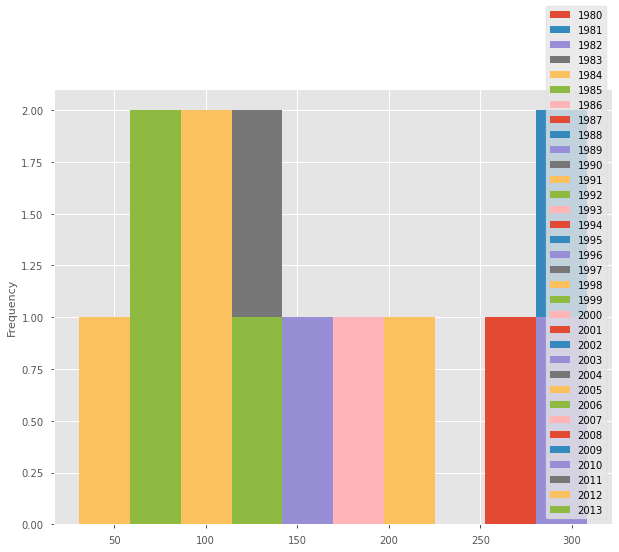

In [128]:
df_countries.plot(kind='hist',figsize=(10,8))

In [129]:
## we need to transpose the data before we can plot:
df_countries = df_countries.transpose()

In [130]:
df_countries.head()

Country  Denmark  Norway  Sweden
1980         272     116     281
1981         293      77     308
1982         299     106     222
1983         106      51     176
1984          93      31     128

<AxesSubplot:ylabel='Frequency'>

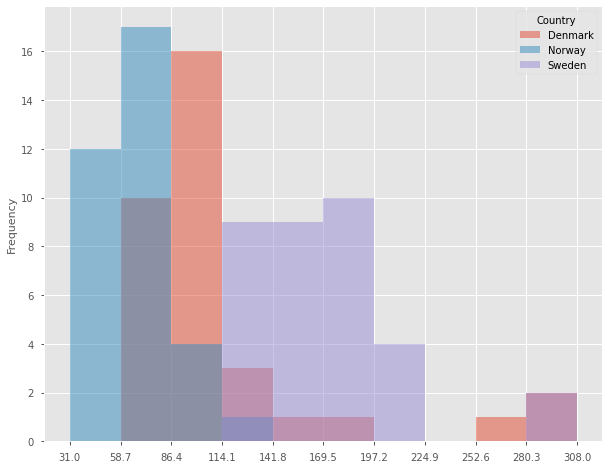

In [131]:
counts,bin_edges =np.histogram(df_countries)
df_countries.plot(kind='hist',figsize=(10,8),alpha=0.5,xticks=bin_edges)

<AxesSubplot:ylabel='Frequency'>

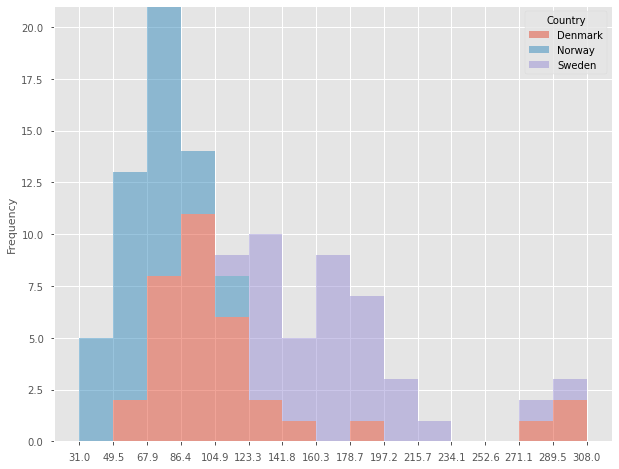

In [132]:
counts,bin_edges =np.histogram(df_countries,15)

df_countries.plot(kind='hist',figsize=(10,8),alpha=0.5,stacked=True,xticks=bin_edges,bins=15)

In [133]:
## to get all the available colours:
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


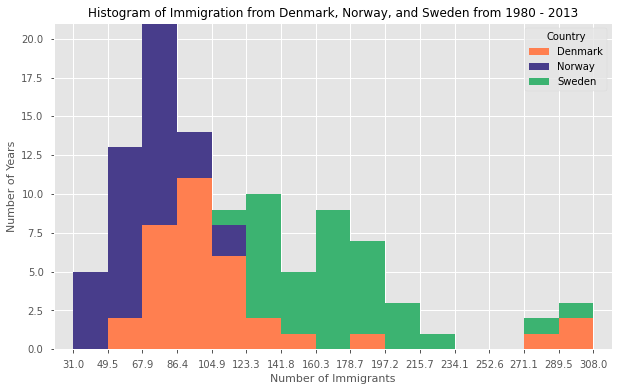

In [134]:
count, bin_edges = np.histogram(df_countries, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_countries.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

## Barcharts:

In [135]:
## using icelands immigration data over the  years to plot the charts:
df_ice = df_can.loc[['Iceland'],years]

In [136]:
df_ice.head()

1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  \
Country                                                              ...   
Iceland    17    33    10     9    13     6    11    11     7     3  ...   

         2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  
Country                                                              
Iceland    23    10     2    15    13    15    30    38    42    72  

[1 rows x 34 columns]

In [137]:
df_ice_br = df_ice.transpose()

In [138]:
df_ice_br.head()

Country  Iceland
1980          17
1981          33
1982          10
1983           9
1984          13

Text(0, 0.5, 'number')

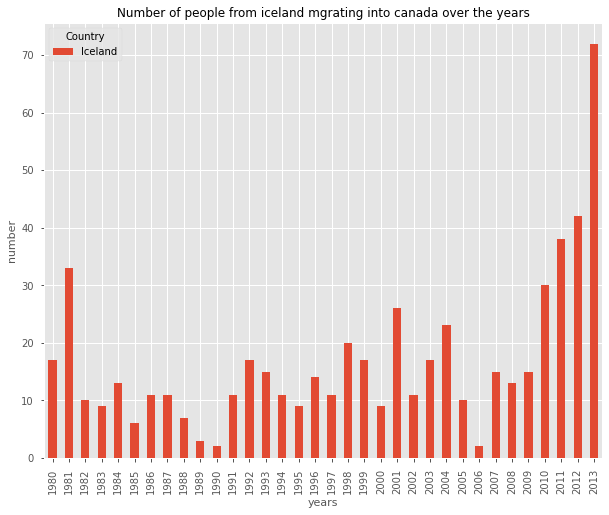

In [139]:
## plotting the bar chart:
df_ice_br.plot(kind='bar',figsize=(10,8))
plt.title("Number of people from iceland mgrating into canada over the years")
plt.xlabel("years")
plt.ylabel("number")

In [140]:
## using annotations to plot the arrow and show the cause using the text:
#- `s`: the text of annotation.
#- `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
#- `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
#- `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
#- `arrowprops`: Takes a dictionary of properties to draw the arrow:
    #- `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    #- `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    #- `color`: Specifes color of arror.
    #- `lw`: Specifies the line width.

Text(28, 30, '2008 - 2011 Financial Crisis')

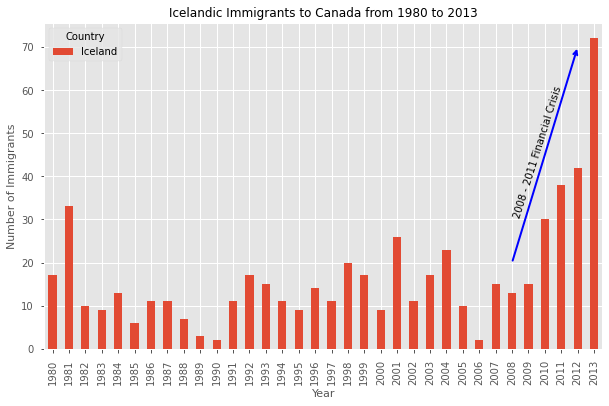

In [141]:
df_ice_br.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )


## Pie charts:

In [142]:
## general process of group by functions:
#1. **Split:** Splitting the data into groups based on some criteria.
#2. **Apply:** Applying a function to each group independently:
       #.sum()
       #.count()
       #.mean() 
       #.std() 
       #.aggregate()
       #.apply()
       #.etc..
#3. **Combine:** Combining the results into a data structure.

In [143]:
## using the group by feature of the pandas library to group the continents:
df_can.head()

Continent  \
Country                                                        
India                                                   Asia   
China                                                   Asia   
United Kingdom of Great Britain and Northern Ir...    Europe   
Philippines                                             Asia   
Pakistan                                                Asia   

                                                                Region  \
Country                                                                  
India                                                    Southern Asia   
China                                                     Eastern Asia   
United Kingdom of Great Britain and Northern Ir...     Northern Europe   
Philippines                                         South-Eastern Asia   
Pakistan                                                 Southern Asia   

                                                               DevName   1980  \
Country                                                                         
India                                               Developing regions   8880   
China                                               Developing regions   5123   
United Kingdom of Great Britain and Northern Ir...   Developed regions  22045   
Philippines                                         Developing regions   6051   
Pakistan                                            Developing regions    978   

                                                     1981   1982   1983  \
Country                                                                   
India                                                8670   8147   7338   
China                                                6682   3308   1863   
United Kingdom of Great Britain and Northern Ir...  24796  20620  10015   
Philippines                                          5921   5249   4562   
Pakistan                                              972   1201    900   

                                                     1984  1985  1986  ...  \
Country                                                                ...   
India                                                5704  4211  7150  ...   
China                                                1527  1816  1960  ...   
United Kingdom of Great Britain and Northern Ir...  10170  9564  9470  ...   
Philippines                                          3801  3150  4166  ...   
Pakistan                                              668   514   691  ...   

                                                     2013  Unnamed: 43  \
Country                                                                  
India                                               33087          NaN   
China                                               34129          NaN   
United Kingdom of Great Britain and Northern Ir...   5827          NaN   
Philippines                                         29544          NaN   
Pakistan                                            12603          NaN   

                                                    Unnamed: 44  Unnamed: 45  \
Country                                                                        
India                                                       NaN          NaN   
China                                                       NaN          NaN   
United Kingdom of Great Britain and Northern Ir...          NaN          NaN   
Philippines                                                 NaN          NaN   
Pakistan                                                    NaN          NaN   

                                                    Unnamed: 46  Unnamed: 47  \
Country                                                                        
India                                                       NaN          NaN   
China                                                       NaN          NaN   
United Kingdom of Great Britain and Northe

In [144]:
df_conti = df_can.groupby(['Continent'], axis=0).sum()
## the output of a groupby method is a groupby object,which cannot be used  further until a method such as sum() is applied:

In [145]:
df_conti.head()

1980   1981   1982   1983   1984   1985  \
Continent                                                                   
Africa                            3951   4363   3819   2671   2639   2650   
Asia                             31025  34314  30214  24696  27274  23850   
Europe                           39760  44802  42720  24638  22287  20844   
Latin America and the Caribbean  13081  15215  16769  15427  13678  15171   
Northern America                  9378  10030   9074   7100   6661   6543   

                                  1986   1987   1988   1989  ...    2013  \
Continent                                                    ...           
Africa                            3782   7494   7552   9894  ...   38543   
Asia                             28739  43203  47454  60256  ...  155075   
Europe                           24370  46698  54726  60893  ...   28691   
Latin America and the Caribbean  21179  28471  21924  25060  ...   24950   
Northern America                  7074   7705   6469   6790  ...    8503   

                                 Unnamed: 43  Unnamed: 44  Unnamed: 45  \
Continent                                                                
Africa                                   0.0          0.0          0.0   
Asia                                     0.0          0.0          0.0   
Europe                                   0.0          0.0          0.0   
Latin America and the Caribbean          0.0          0.0          0.0   
Northern America                         0.0          0.0          0.0   

                                 Unnamed: 46  Unnamed: 47  Unnamed: 48  \
Continent                                                                
Africa                                   0.0          0.0          0.0   
Asia                                     0.0          0.0          0.0   
Europe                                   0.0          0.0          0.0   
Latin America and the Caribbean          0.0          0.0          0.0   
Northern America                         0.0          0.0          0.0   

                                 Unnamed: 49  Unnamed: 50      Total  
Continent                                                             
Africa                                   0.0          0.0   618948.0  
Asia                                     0.0          0.0  3317794.0  
Europe                                   0.0          0.0  1410947.0  
Latin America and the Caribbean          0.0          0.0   765148.0  
Northern America                         0.0          0.0   241142.0  

[5 rows x 43 columns]

(-1.1107545164204682,
 1.1260912315394227,
 -1.1088256922156103,
 1.1004202711684166)

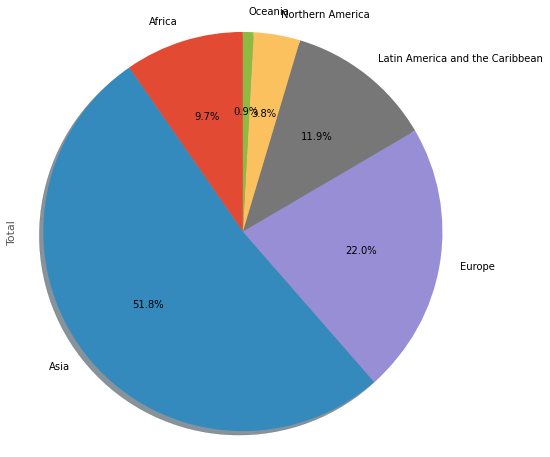

In [146]:
## plotting the pie chart:
df_conti['Total'].plot(kind='pie',
             figsize=(8,8),
             autopct ='%1.1f%%',
             startangle = 90,
             shadow = True)
plt.axis('equal') # Sets the pie chart to look like a circle.
#- `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
#- `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
#- `shadow` - Draws a shadow beneath the pie (to give a 3D feel).

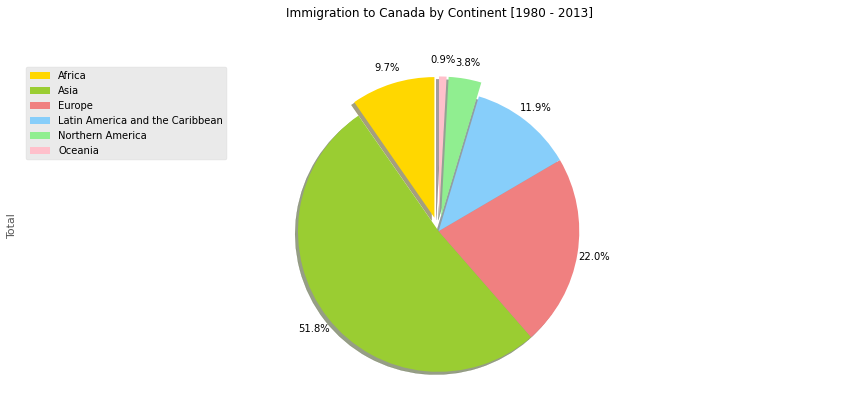

In [147]:
## we see overlapping labels and percentages in the pie chart:
#* Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
#* Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
#* Pass in a custom set of colors for continents by passing in `colors` parameter.
#* Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in `explode` parameter.

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_conti['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_conti.index, loc='upper left') 

plt.show()

## Box plots

In [148]:
## plotting the data from japanese immigrans from q983 to 213:
df_japan = df_can.loc[['Japan'],years]

In [149]:
df_japan.head()

1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  \
Country                                                              ...   
Japan     701   756   598   309   246   198   248   422   324   494  ...   

         2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  
Country                                                              
Japan     973  1067  1212  1250  1284  1194  1168  1265  1214   982  

[1 rows x 34 columns]

In [150]:
df_japan = df_japan.transpose()

<AxesSubplot:>

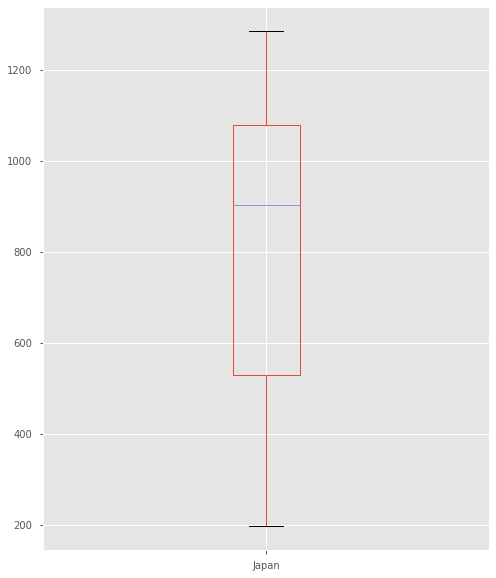

In [151]:
df_japan.plot(kind ='box',figsize=(8,10))

In [152]:
df_japan.describe()

Country        Japan
count      34.000000
mean      814.911765
std       337.219771
min       198.000000
25%       529.000000
50%       902.000000
75%      1079.000000
max      1284.000000

In [153]:
df_CI = df_can.loc[['China','India'],years]

In [154]:
df_CI = df_CI.transpose()

<AxesSubplot:>

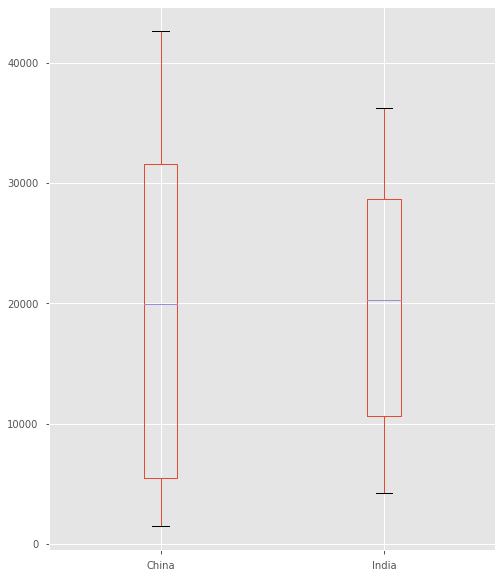

In [155]:
df_CI.plot(kind ='box',figsize=(8,10))

In [156]:
df_CI.describe()

Country         China         India
count       34.000000     34.000000
mean     19410.647059  20350.117647
std      13568.230790  10007.342579
min       1527.000000   4211.000000
25%       5512.750000  10637.750000
50%      19945.000000  20235.000000
75%      31568.500000  28699.500000
max      42584.000000  36210.000000

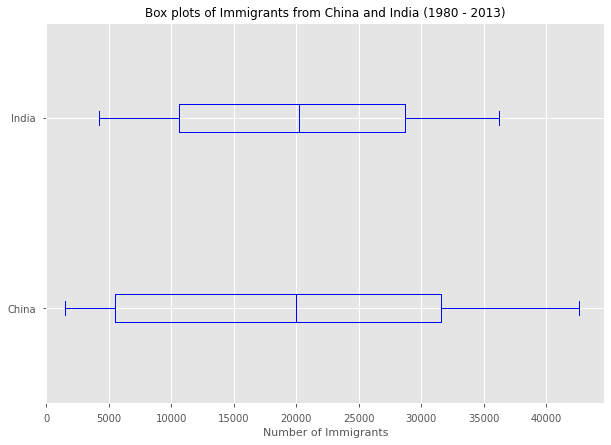

In [157]:
## horizontal box plots:
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')
plt.xlim(0)
plt.show()

## subplots inside a boxplot:

In [158]:
#To visualize multiple plots together, we can create a figure (overall canvas)
#and divide it into subplots, each containing a plot. With subplots, we usually work with the artist layer instead of the scripting layer. 

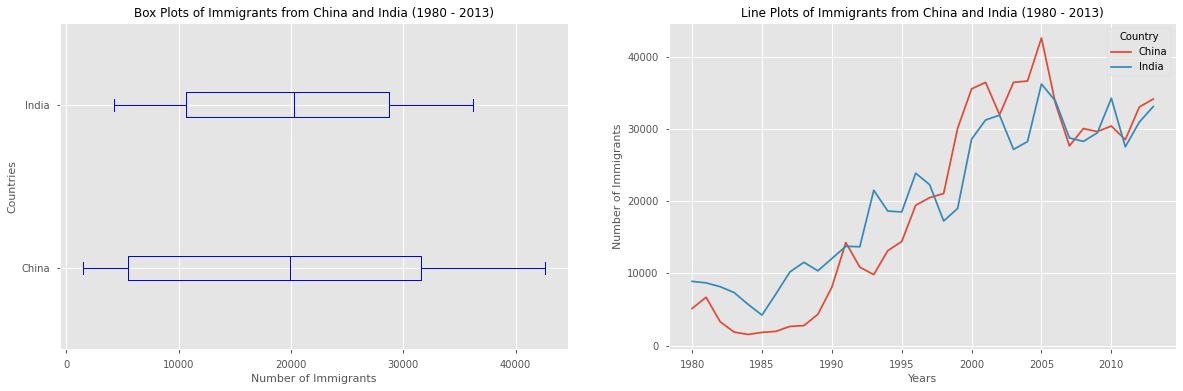

In [159]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig5Subplots_V2.png" width=500 align="center">

In [160]:
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

Continent  \
Country                                                                               
India                                                                          Asia   
China                                                                          Asia   
United Kingdom of Great Britain and Northern Ir...                           Europe   
Philippines                                                                    Asia   
Pakistan                                                                       Asia   
United States of America                                           Northern America   
Iran (Islamic Republic of)                                                     Asia   
Sri Lanka                                                                      Asia   
Republic of Korea                                                              Asia   
Poland                                                                       Europe   
Lebanon                                                                        Asia   
France                                                                       Europe   
Jamaica                                             Latin America and the Caribbean   
Viet Nam                                                                       Asia   
Romania                                                                      Europe   

                                                                Region  \
Country                                                                  
India                                                    Southern Asia   
China                                                     Eastern Asia   
United Kingdom of Great Britain and Northern Ir...     Northern Europe   
Philippines                                         South-Eastern Asia   
Pakistan                                                 Southern Asia   
United States of America                              Northern America   
Iran (Islamic Republic of)                               Southern Asia   
Sri Lanka                                                Southern Asia   
Republic of Korea                                         Eastern Asia   
Poland                                                  Eastern Europe   
Lebanon                                                   Western Asia   
France                                                  Western Europe   
Jamaica                                                      Caribbean   
Viet Nam                                            South-Eastern Asia   
Romania                                                 Eastern Europe   

                                                               DevName   1980  \
Country                                                                         
India                                               Developing regions   8880   
China                                               Developing regions   5123   
United Kingdom of Great Britain and Northern Ir...   Developed regions  22045   
Philippines                                         Developing regions   6051   
Pakistan                                            Developing regions    978   
United States of America                             Developed regions   9378   
Iran (Islamic Republic of)                          Developing regions   1172   
Sri Lanka                                           Developing regions    185   
Republic of Korea                                   Developing regions   1011   
Poland                                               Developed regions    863   
Lebanon                                             Developing regions   1409   
France                                               Developed regions   1729   
Jamaica                                             Developing regions   3198   
Viet Nam                                            Developing regions   1191   
Romania                                

In [161]:
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

In [162]:
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

In [163]:
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

In [164]:
new_df.head()

1980s   1990s   2000s
Country                                                                   
India                                                82154  180395  303591
China                                                32003  161528  340385
United Kingdom of Great Britain and Northern Ir...  179171  261966   83413
Philippines                                          60764  138482  172904
Pakistan                                             10591   65302  127598

Text(0.5, 1.0, 'Immigration from top 15 countries for decades 80s, 90s and 2000s')

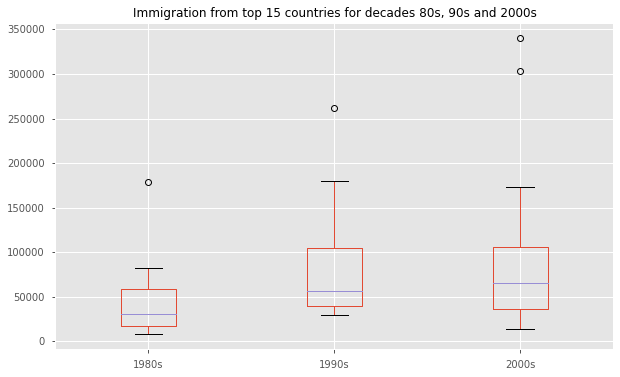

In [165]:
new_df.plot(kind='box', figsize=(10, 6))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

In [166]:
new_df.describe()

1980s          1990s          2000s
count      15.000000      15.000000      15.000000
mean    44418.333333   85594.666667   97471.533333
std     44190.676455   68237.560246  100583.204205
min      7613.000000   30028.000000   13629.000000
25%     16698.000000   39259.000000   36101.500000
50%     30638.000000   56915.000000   65794.000000
75%     59183.000000  104451.500000  105505.500000
max    179171.000000  261966.000000  340385.000000

In [167]:
## to identify an oulier:
# larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
# smaller than Q1 by at least 1.5 times the IQR.

## scatter plots:

In [168]:
df_can.head()

Continent  \
Country                                                        
India                                                   Asia   
China                                                   Asia   
United Kingdom of Great Britain and Northern Ir...    Europe   
Philippines                                             Asia   
Pakistan                                                Asia   

                                                                Region  \
Country                                                                  
India                                                    Southern Asia   
China                                                     Eastern Asia   
United Kingdom of Great Britain and Northern Ir...     Northern Europe   
Philippines                                         South-Eastern Asia   
Pakistan                                                 Southern Asia   

                                                               DevName   1980  \
Country                                                                         
India                                               Developing regions   8880   
China                                               Developing regions   5123   
United Kingdom of Great Britain and Northern Ir...   Developed regions  22045   
Philippines                                         Developing regions   6051   
Pakistan                                            Developing regions    978   

                                                     1981   1982   1983  \
Country                                                                   
India                                                8670   8147   7338   
China                                                6682   3308   1863   
United Kingdom of Great Britain and Northern Ir...  24796  20620  10015   
Philippines                                          5921   5249   4562   
Pakistan                                              972   1201    900   

                                                     1984  1985  1986  ...  \
Country                                                                ...   
India                                                5704  4211  7150  ...   
China                                                1527  1816  1960  ...   
United Kingdom of Great Britain and Northern Ir...  10170  9564  9470  ...   
Philippines                                          3801  3150  4166  ...   
Pakistan                                              668   514   691  ...   

                                                     2013  Unnamed: 43  \
Country                                                                  
India                                               33087          NaN   
China                                               34129          NaN   
United Kingdom of Great Britain and Northern Ir...   5827          NaN   
Philippines                                         29544          NaN   
Pakistan                                            12603          NaN   

                                                    Unnamed: 44  Unnamed: 45  \
Country                                                                        
India                                                       NaN          NaN   
China                                                       NaN          NaN   
United Kingdom of Great Britain and Northern Ir...          NaN          NaN   
Philippines                                                 NaN          NaN   
Pakistan                                                    NaN          NaN   

                                                    Unnamed: 46  Unnamed: 47  \
Country                                                                        
India                                                       NaN          NaN   
China                                                       NaN          NaN   
United Kingdom of Great Britain and Northe

In [169]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

In [170]:
# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

year   total
0  1980   99137
1  1981  110563
2  1982  104271
3  1983   75550
4  1984   73417

In [171]:
df_tot.reset_index = [years]

In [172]:
# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
#df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

year   total
0  1980   99137
1  1981  110563
2  1982  104271
3  1983   75550
4  1984   73417

In [173]:
df_tot.reset_index

[['1980',
  '1981',
  '1982',
  '1983',
  '1984',
  '1985',
  '1986',
  '1987',
  '1988',
  '1989',
  '1990',
  '1991',
  '1992',
  '1993',
  '1994',
  '1995',
  '1996',
  '1997',
  '1998',
  '1999',
  '2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013']]

In [174]:
df_tot.head()

year   total
0  1980   99137
1  1981  110563
2  1982  104271
3  1983   75550
4  1984   73417

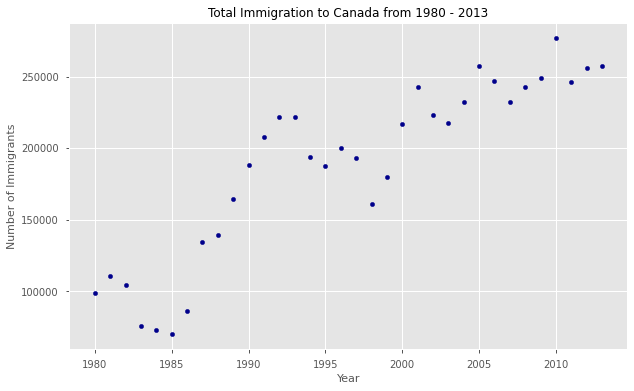

In [175]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [176]:
## to get the best line of fit across the given data:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

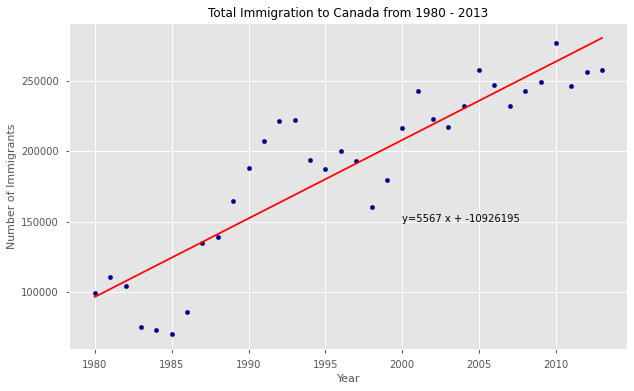

'No. Immigrants = 5567 * Year + -10926195'

In [177]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

## rather use regplot for a better and direct regression fit

<AxesSubplot:xlabel='year', ylabel='total'>

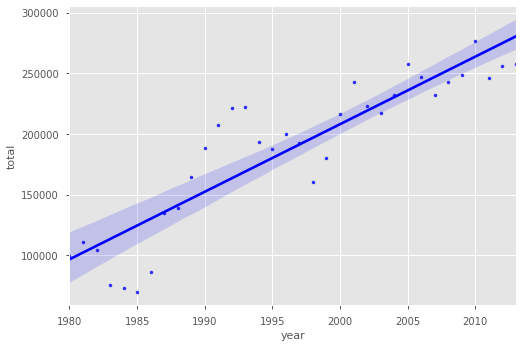

In [178]:
sns.regplot(x='year',y='total',data=df_tot,color='blue',marker='.')

## Bubbleplots:
A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. In `maplotlib`, we can pass in an array or scalar to the keyword `s` to `plot()`, that contains the weight of each point.

In [179]:
df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country  Year  India  China  \
0        1980   8880   5123   
1        1981   8670   6682   
2        1982   8147   3308   
3        1983   7338   1863   
4        1984   5704   1527   

Country  United Kingdom of Great Britain and Northern Ireland  Philippines  \
0                                                    22045            6051   
1                                                    24796            5921   
2                                                    20620            5249   
3                                                    10015            4562   
4                                                    10170            3801   

Country  Pakistan  United States of America  Iran (Islamic Republic of)  \
0             978                      9378                        1172   
1             972                     10030                        1429   
2            1201                      9074                        1822   
3             900                      7100                        1592   
4             668                      6661                        1977   

Country  Sri Lanka  Republic of Korea  ...  Kiribati  Vanuatu  \
0              185               1011  ...         0        0   
1              371               1456  ...         0        0   
2              290               1572  ...         0        0   
3              197               1081  ...         1        0   
4             1086                847  ...         0        0   

Country  Sao Tome and Principe  Tuvalu  American Samoa  San Marino  \
0                            0       0               0           1   
1                            0       1               1           0   
2                            0       0               0           0   
3                            0       0               0           0   
4                            0       1               0           0   

Country  New Caledonia  Marshall Islands  Western Sahara  Palau  
0                    0                 0               0      0  
1                    0                 0               0      0  
2                    0                 0               0      0  
3                    0                 0               0      0  
4                    0                 0               0      0  

[5 rows x 196 columns]

In [180]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

In [181]:
norm_brazil

0     0.032820
1     0.036467
2     0.025122
3     0.003647
4     0.006078
5     0.000000
6     0.030389
7     0.046191
8     0.106969
9     0.210697
10    0.210697
11    0.302674
12    0.379254
13    0.298217
14    0.176661
15    0.179092
16    0.184765
17    0.186791
18    0.162480
19    0.200972
20    0.289708
21    0.290519
22    0.249190
23    0.287277
24    0.318882
25    0.339951
26    0.425851
27    0.654781
28    0.813614
29    0.963938
30    1.000000
31    0.558347
32    0.612642
33    0.641815
Name: Brazil, dtype: float64

- To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter. 
- We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore we will:
    - multiply weights by 2000 to scale it up on the graph, and,
    - add 10 to compensate for the min value (which has a 0 weight and therefore scale with x2000).

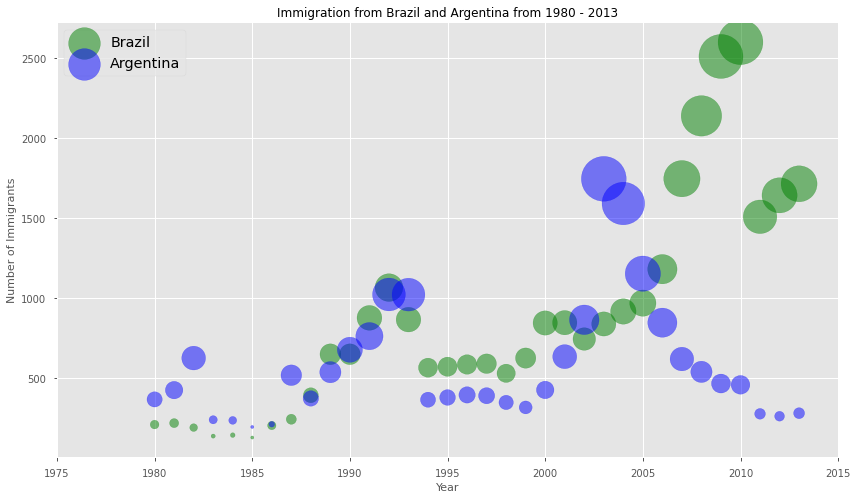

In [182]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [183]:
df_CI.head()

Country  China  India
1980      5123   8880
1981      6682   8670
1982      3308   8147
1983      1863   7338
1984      1527   5704

In [184]:
!pip install pywaffle

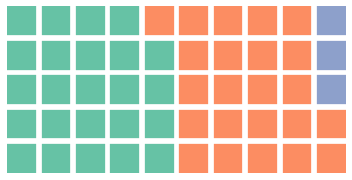

In [185]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    columns=10, 
    values=[48, 46, 6],
    figsize=(5, 3)
)
plt.show()

In [186]:
df_scandi = df_can.loc[['Denmark','Norway','Sweden'],:]

In [187]:
df_scandi.head()

Continent           Region            DevName  1980  1981  1982  1983  \
Country                                                                         
Denmark    Europe  Northern Europe  Developed regions   272   293   299   106   
Norway     Europe  Northern Europe  Developed regions   116    77   106    51   
Sweden     Europe  Northern Europe  Developed regions   281   308   222   176   

         1984  1985  1986  ...  2013  Unnamed: 43  Unnamed: 44  Unnamed: 45  \
Country                    ...                                                
Denmark    93    73    93  ...    81          NaN          NaN          NaN   
Norway     31    54    56  ...    59          NaN          NaN          NaN   
Sweden    128   158   187  ...   140          NaN          NaN          NaN   

         Unnamed: 46  Unnamed: 47  Unnamed: 48  Unnamed: 49  Unnamed: 50  \
Country                                                                    
Denmark          NaN          NaN          NaN          NaN          NaN   
Norway           NaN          NaN          NaN          NaN          NaN   
Sweden           NaN          NaN          NaN          NaN          NaN   

          Total  
Country          
Denmark  3901.0  
Norway   2327.0  
Sweden   5866.0  

[3 rows x 46 columns]

In [188]:
df_scandi

Continent           Region            DevName  1980  1981  1982  1983  \
Country                                                                         
Denmark    Europe  Northern Europe  Developed regions   272   293   299   106   
Norway     Europe  Northern Europe  Developed regions   116    77   106    51   
Sweden     Europe  Northern Europe  Developed regions   281   308   222   176   

         1984  1985  1986  ...  2013  Unnamed: 43  Unnamed: 44  Unnamed: 45  \
Country                    ...                                                
Denmark    93    73    93  ...    81          NaN          NaN          NaN   
Norway     31    54    56  ...    59          NaN          NaN          NaN   
Sweden    128   158   187  ...   140          NaN          NaN          NaN   

         Unnamed: 46  Unnamed: 47  Unnamed: 48  Unnamed: 49  Unnamed: 50  \
Country                                                                    
Denmark          NaN          NaN          NaN          NaN          NaN   
Norway           NaN          NaN          NaN          NaN          NaN   
Sweden           NaN          NaN          NaN          NaN          NaN   

          Total  
Country          
Denmark  3901.0  
Norway   2327.0  
Sweden   5866.0  

[3 rows x 46 columns]

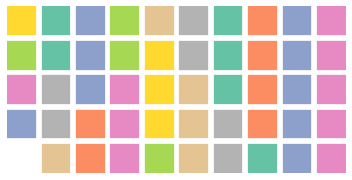

In [189]:
data = df_scandi
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    columns=10, 
    values=list(range(0,20)),
    figsize=(5, 3))
plt.show()

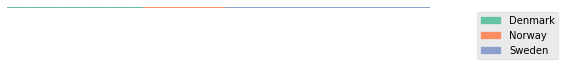

In [190]:
data = {'Denmark': 3901, 'Norway': 2327, 'Sweden': 5866}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.show()

In [191]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_scandi.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [192]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_scandi.index.values # categories
values = df_scandi['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 576x396 with 0 Axes>

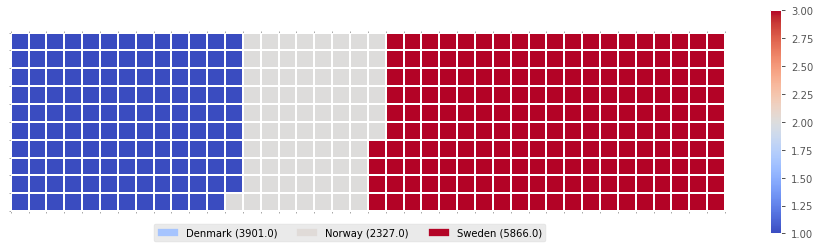

In [193]:
create_waffle_chart(categories, values, height, width, colormap)

## Wordclouds

In [194]:
alice_novel = open('data/alice_novel.txt', 'r').read()

In [195]:
stopwords = set(STOPWORDS)

In [196]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

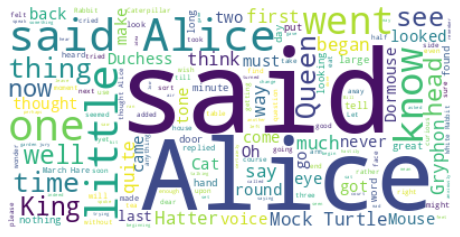

In [197]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

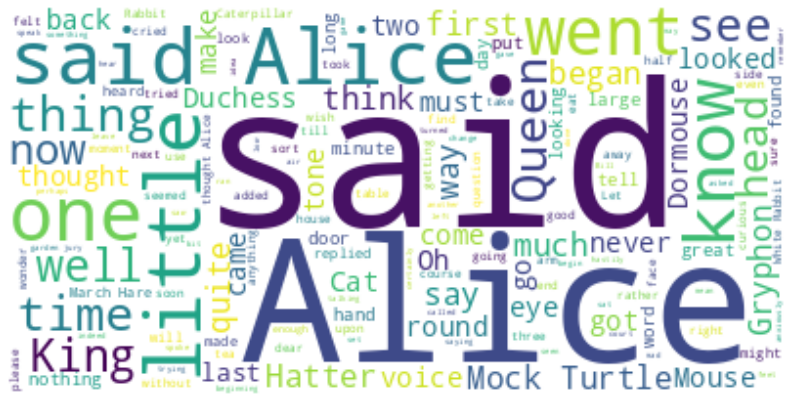

In [198]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

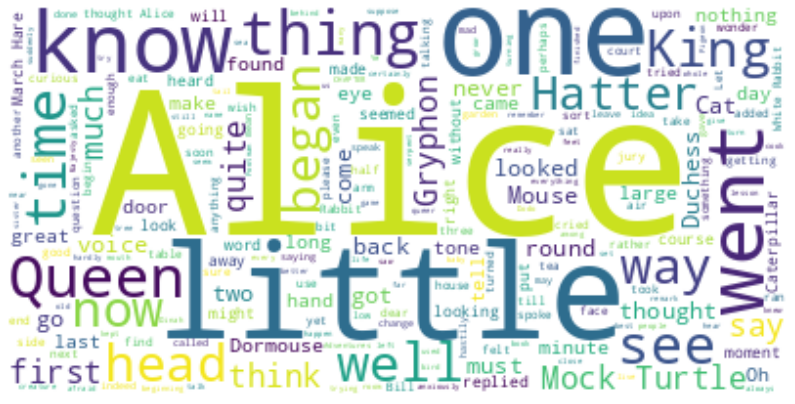

In [199]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [200]:
alice_mask = np.array(Image.open('data/alice_mask.png'))

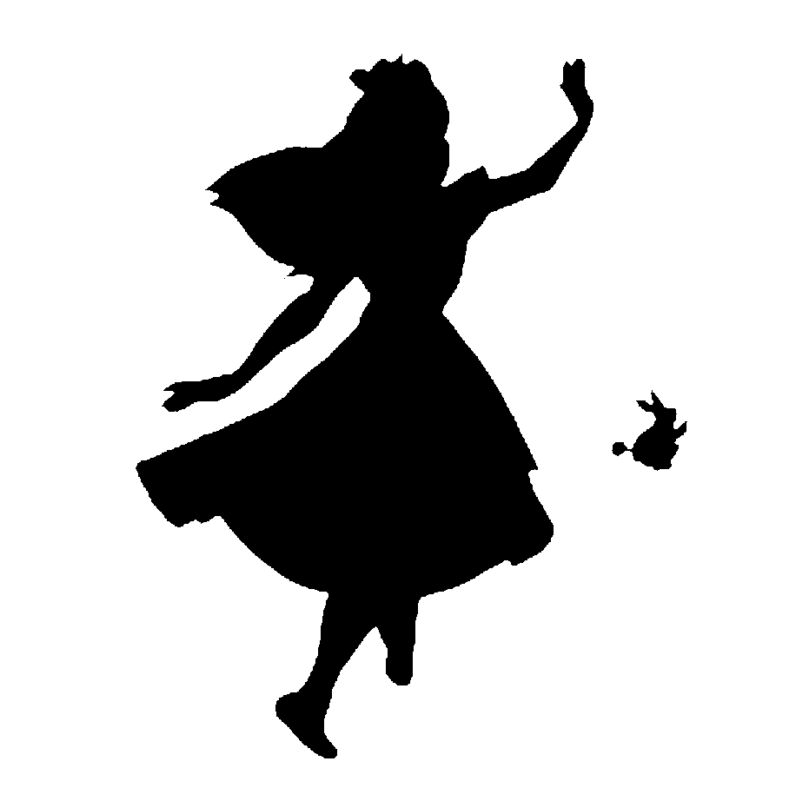

In [201]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

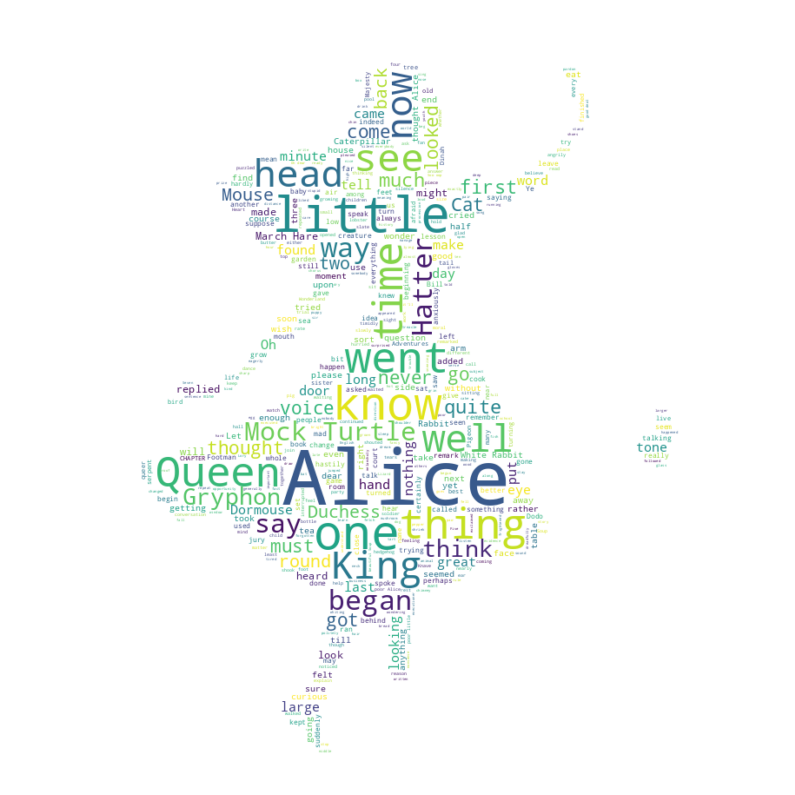

In [202]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [203]:
df_can.head()

Continent  \
Country                                                        
India                                                   Asia   
China                                                   Asia   
United Kingdom of Great Britain and Northern Ir...    Europe   
Philippines                                             Asia   
Pakistan                                                Asia   

                                                                Region  \
Country                                                                  
India                                                    Southern Asia   
China                                                     Eastern Asia   
United Kingdom of Great Britain and Northern Ir...     Northern Europe   
Philippines                                         South-Eastern Asia   
Pakistan                                                 Southern Asia   

                                                               DevName   1980  \
Country                                                                         
India                                               Developing regions   8880   
China                                               Developing regions   5123   
United Kingdom of Great Britain and Northern Ir...   Developed regions  22045   
Philippines                                         Developing regions   6051   
Pakistan                                            Developing regions    978   

                                                     1981   1982   1983  \
Country                                                                   
India                                                8670   8147   7338   
China                                                6682   3308   1863   
United Kingdom of Great Britain and Northern Ir...  24796  20620  10015   
Philippines                                          5921   5249   4562   
Pakistan                                              972   1201    900   

                                                     1984  1985  1986  ...  \
Country                                                                ...   
India                                                5704  4211  7150  ...   
China                                                1527  1816  1960  ...   
United Kingdom of Great Britain and Northern Ir...  10170  9564  9470  ...   
Philippines                                          3801  3150  4166  ...   
Pakistan                                              668   514   691  ...   

                                                     2013  Unnamed: 43  \
Country                                                                  
India                                               33087          NaN   
China                                               34129          NaN   
United Kingdom of Great Britain and Northern Ir...   5827          NaN   
Philippines                                         29544          NaN   
Pakistan                                            12603          NaN   

                                                    Unnamed: 44  Unnamed: 45  \
Country                                                                        
India                                                       NaN          NaN   
China                                                       NaN          NaN   
United Kingdom of Great Britain and Northern Ir...          NaN          NaN   
Philippines                                                 NaN          NaN   
Pakistan                                                    NaN          NaN   

                                                    Unnamed: 46  Unnamed: 47  \
Country                                                                        
India                                                       NaN          NaN   
China                                                       NaN          NaN   
United Kingdom of Great Britain and Northe

In [204]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153.0

In [205]:
# Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'India India India India India India India India India China China China China China China China China China Philippines Philippines Philippines Philippines Philippines Philippines Philippines Pakistan Pakistan Pakistan Poland Lebanon France Jamaica Romania Haiti Guyana Portugal Egypt Morocco Colombia '

In [206]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


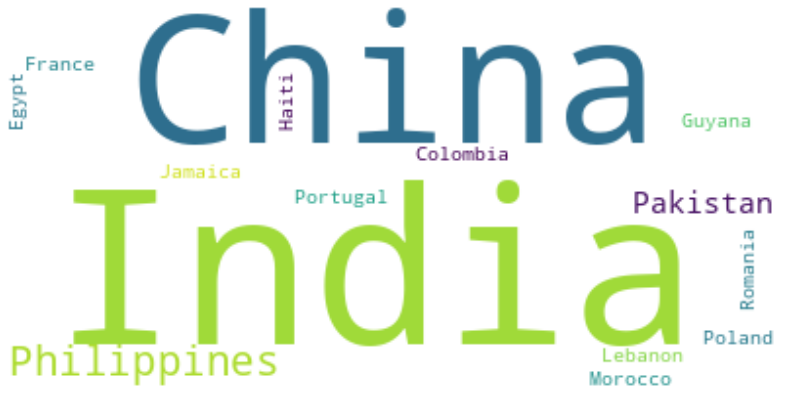

In [207]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Regression plots...

# Visualisation on the map using folium and choropleth 

In [208]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [209]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4)

# display world map
world_map

### 1. Stamen toner maps

In [210]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Toner')

# display map
world_map

### 2. stamen terrain maps

In [211]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Terrain')

# display map
world_map

### 3. mapbox bright maps

In [212]:
# create a world map with a Mapbox Bright style.
world_map = folium.Map(location=[66.130, -106.35], zoom_start=2,tiles='Stamen Terrain')

# display the map
world_map

In [213]:
## maps with markers
df_incidents = pd.read_csv('data/Police_Department_Incidents_2016.csv')

In [214]:
df_incidents.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

In [215]:
# So each row consists of 13 features:
#> 1. IncidntNum: Incident Number
#> 2. Category: Category of crime or incident
#> 3. Descript: Description of the crime or incident
#> 4. DayOfWeek: The day of week on which the incident occurred
#> 5. Date: The Date on which the incident occurred
#> 6. Time: The time of day on which the incident occurred
#> 7. PdDistrict: The police department district
#> 8. Resolution: The resolution of the crime in terms whether the perpetrator was arrested or not
#> 9. Address: The closest address to where the incident took place
#> 10. X: The longitude value of the crime location 
#> 11. Y: The latitude value of the crime location
#> 12. Location: A tuple of the latitude and the longitude values
#> 13. PdId: The police department ID
    

In [216]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [217]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [218]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

In [219]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()


# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

In [220]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

In [221]:
# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

## choropleth maps

In [222]:
## using hte immigration into canada:
df_can.head()

Continent  \
Country                                                        
India                                                   Asia   
China                                                   Asia   
United Kingdom of Great Britain and Northern Ir...    Europe   
Philippines                                             Asia   
Pakistan                                                Asia   

                                                                Region  \
Country                                                                  
India                                                    Southern Asia   
China                                                     Eastern Asia   
United Kingdom of Great Britain and Northern Ir...     Northern Europe   
Philippines                                         South-Eastern Asia   
Pakistan                                                 Southern Asia   

                                                               DevName   1980  \
Country                                                                         
India                                               Developing regions   8880   
China                                               Developing regions   5123   
United Kingdom of Great Britain and Northern Ir...   Developed regions  22045   
Philippines                                         Developing regions   6051   
Pakistan                                            Developing regions    978   

                                                     1981   1982   1983  \
Country                                                                   
India                                                8670   8147   7338   
China                                                6682   3308   1863   
United Kingdom of Great Britain and Northern Ir...  24796  20620  10015   
Philippines                                          5921   5249   4562   
Pakistan                                              972   1201    900   

                                                     1984  1985  1986  ...  \
Country                                                                ...   
India                                                5704  4211  7150  ...   
China                                                1527  1816  1960  ...   
United Kingdom of Great Britain and Northern Ir...  10170  9564  9470  ...   
Philippines                                          3801  3150  4166  ...   
Pakistan                                              668   514   691  ...   

                                                     2013  Unnamed: 43  \
Country                                                                  
India                                               33087          NaN   
China                                               34129          NaN   
United Kingdom of Great Britain and Northern Ir...   5827          NaN   
Philippines                                         29544          NaN   
Pakistan                                            12603          NaN   

                                                    Unnamed: 44  Unnamed: 45  \
Country                                                                        
India                                                       NaN          NaN   
China                                                       NaN          NaN   
United Kingdom of Great Britain and Northern Ir...          NaN          NaN   
Philippines                                                 NaN          NaN   
Pakistan                                                    NaN          NaN   

                                                    Unnamed: 46  Unnamed: 47  \
Country                                                                        
India                                                       NaN          NaN   
China                                                       NaN          NaN   
United Kingdom of Great Britain and Northe

In [223]:
world_geo = r'data/countries_world/CAN.geo.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

In [224]:

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
# let Folium determine the scale.
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=[df_can.index, 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map



/Users/okara/opt/anaconda3/lib/python3.8/site-packages/folium/folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [225]:
df_surv = pd.read_csv('data/Topic_Survey_Assignment.csv',index_col = 0)
df_surv.head()

Very interested  Somewhat interested  \
Big Data (Spark / Hadoop)              1332                  729   
Data Analysis / Statistics             1688                  444   
Data Journalism                         429                 1081   
Data Visualization                     1340                  734   
Deep Learning                          1263                  770   

                            Not interested  
Big Data (Spark / Hadoop)              127  
Data Analysis / Statistics              60  
Data Journalism                        610  
Data Visualization                     102  
Deep Learning                          136

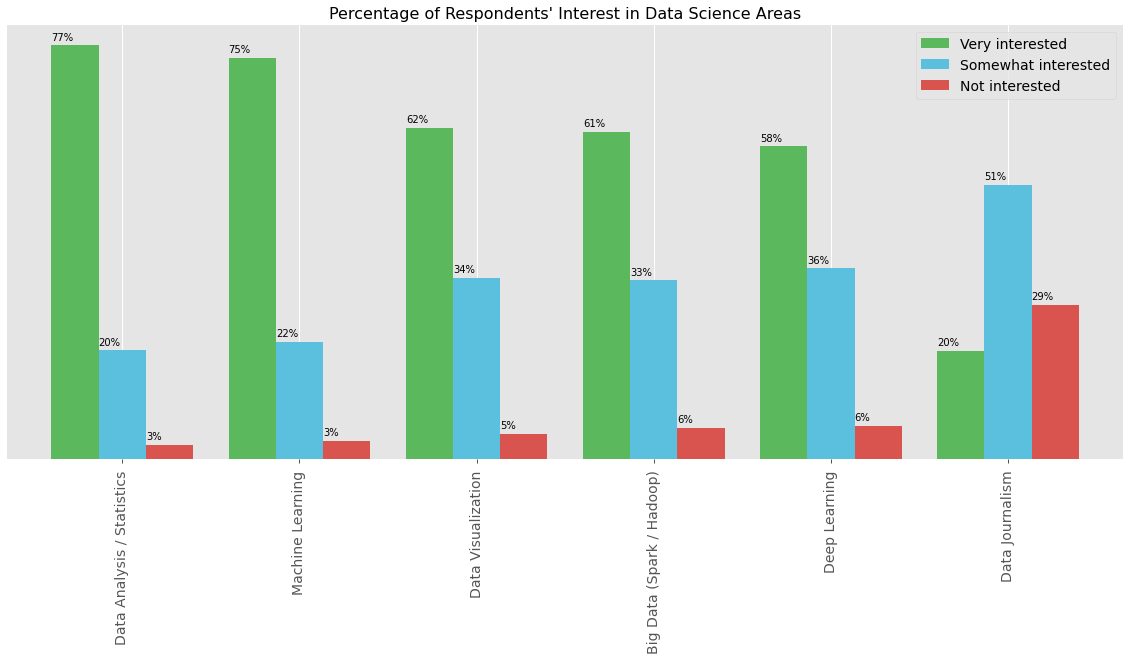

In [231]:
mpl.style.use('ggplot') # optional: for ggplot-like style

df_surv.sort_values(by='Very interested', ascending=False, inplace=True)

# Change this line to plot percentages instead of absolute values
ax = (df_surv.div(df_surv.sum(1), axis=0)).plot(kind='bar', figsize=(20, 8), width = 0.8, color = ['#5cb85c','#5bc0de','#d9534f'])
plt.legend(labels=df_surv.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

plt.show()


In [227]:
df_incidents = pd.read_csv('data/Police_Department_Incidents_2016.csv', index_col=0,)
df_incidents.rename(columns={'PdDistrict':'Neighborhood'}, inplace=True)
df_incidents_1 = df_incidents.groupby(['Neighborhood']).size().reset_index(name='Count') 
df_incidents_1

Neighborhood  Count
0      BAYVIEW  14303
1      CENTRAL  17666
2    INGLESIDE  11594
3      MISSION  19503
4     NORTHERN  20100
5         PARK   8699
6     RICHMOND   8922
7     SOUTHERN  28445
8      TARAVAL  11325
9   TENDERLOIN   9942

In [230]:
sanfran_geo = r'data/world_countries.json' # geojson file

# create a plain world map
sanfran_map = folium.Map(location=[37.77,-122.42], zoom_start=12)

# generate choropleth map
sanfran_map.choropleth(
    geo_data=sanfran_geo,
    data=df_incidents_1,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

# display map
sanfran_map